In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from explicitScheme import diffusionSolver

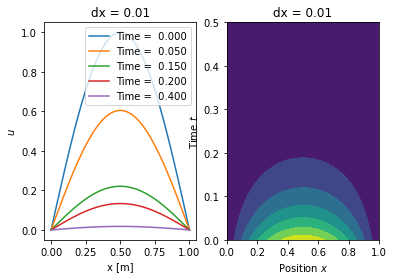

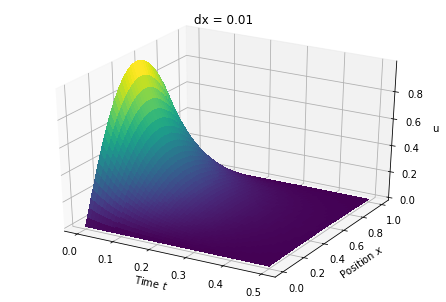

In [7]:
dx = 0.01
dt = dx**2 * 0.5
L = 1
time = 0.5
try1 = diffusionSolver(dx, dt, L, time)
x, t, u = try1.expScheme()
#try1.plot3D(u)
#fig = plt.figure(figzise=(14,7))
plt.subplot(121)
try1.plot2D(u)
plt.subplot(122)
try1.quiverplot(u)
try1.plot3D(u)

In [ ]:
# symmetric matrix
Q = np.random.rand(5,5)
A = (Q.T + Q)/2
#print(A)

In [ ]:
def expscheme(dx, stablim,L,time):
    dt = dx**2*stablim
    Nx = int(L/dx)
    Nt = int(time/dt)
    t = np.zeros(Nt)
    u = np.zeros((Nx,Nt)) # u(x,t)
 
    for j in range(Nt-1): # tid
        t[j+1] = t[j] + dt
        for i in range(1,Nx-1): # sted
            u[i,0] = np.sin(np.pi*(dx*i))
            alpha = dt/dx**2
            u[i,j+1] = alpha*u[i-1,j] + (1 - 2*alpha)*(u[i,j]) + alpha*u[i+1,j]
    return t, u

In [ ]:
def analsol(dx, stablim,L,time):
    dt = dx**2*stablim
    Nx = int(L/dx)
    Nt = int(time/dt)
    t = np.zeros(Nt)
    u = np.zeros((Nx,Nt)) # u(x,t)
    
    for j in range(Nt-1): # tid
        t[j+1] = t[j] + dt
        for i in range(1,Nx-1): # sted
            x = dx*i
            u[i,0] = np.sin(np.pi*x)
            u[i,j+1] = np.exp(-np.pi**2*t[j+1])*np.sin(np.pi*x)
    return t, u

In [ ]:
# approximation

f = plt.figure(figsize=(14,7))
f.suptitle('temperature gradient of a rod.')
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

t, u = expscheme(1/10,1/3,1,0.5)
for j in range(0,10):
    ax1.plot(t,u[j,:], label = f'part {j+1}/10')
ax1.set_xlabel('t [s]'); ax1.set_ylabel(r'$u$ ')
ax1.legend()

t, u = expscheme(1/100,1/3,1,0.5)
for j in range(0,100,10):
    ax2.plot(t,u[j,:], label = f'part {j+1}/100')
ax2.set_xlabel('t [s]'); ax2.set_ylabel(r'$u$ ')
ax2.legend()

In [ ]:
# analytical solution

f = plt.figure(figsize=(20,7))
f.suptitle('temperature gradient of a rod.')
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)

t, u = analsol(1/10,1/3,1,0.5)
for j in range(0,10):
    ax1.plot(t,u[j,:], label = f'part {j+1}/10')
ax1.set_xlabel('t [s]'); ax1.set_ylabel(r'$u$ ')
ax1.legend()

t, u = analsol(1/100,1/3,1,0.5)
for j in range(0,100,10):
    ax2.plot(t,u[j,:], label = f'part {j+1}/100')
ax2.set_xlabel('t [s]'); ax2.set_ylabel(r'$u$ ')
ax2.legend()